In [ ]:
#loading import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read loaded data
loan_data = pd.read_csv('loan_data.csv')

In [ ]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Section 1: Exploratory Data Analysis

OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data

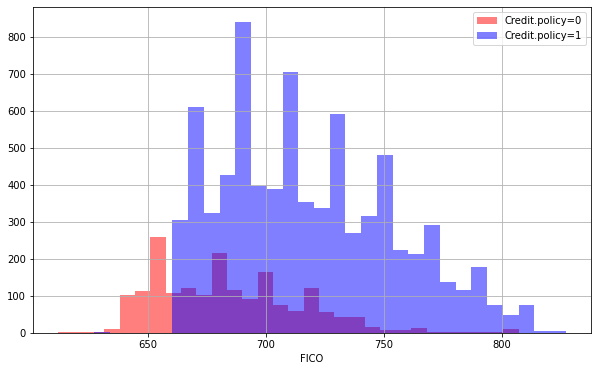

In [ ]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.policy=0')
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.policy=1')
plt.xlabel('FICO')
plt.legend()

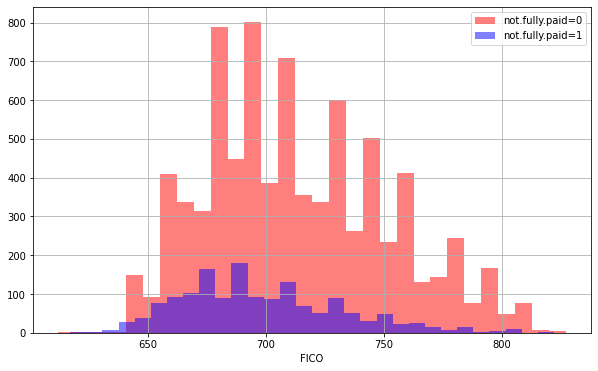

In [ ]:
plt.figure(figsize=(10,6))
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
plt.xlabel('FICO')
plt.legend()

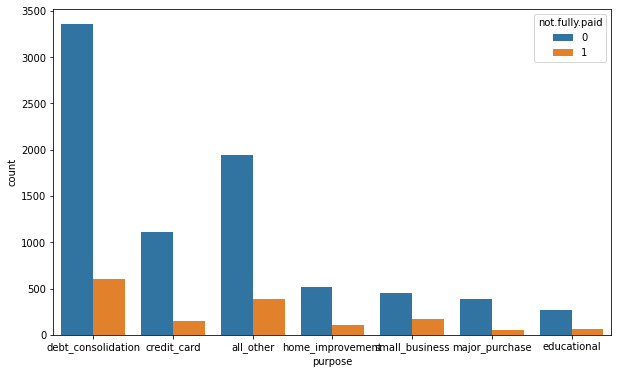

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=loan_data['purpose'],hue=loan_data['not.fully.paid'])

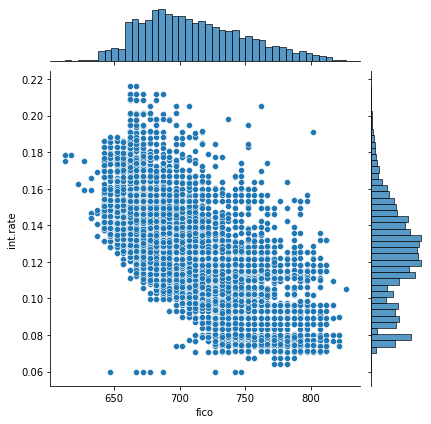

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loan_data)


<Figure size 720x432 with 0 Axes>

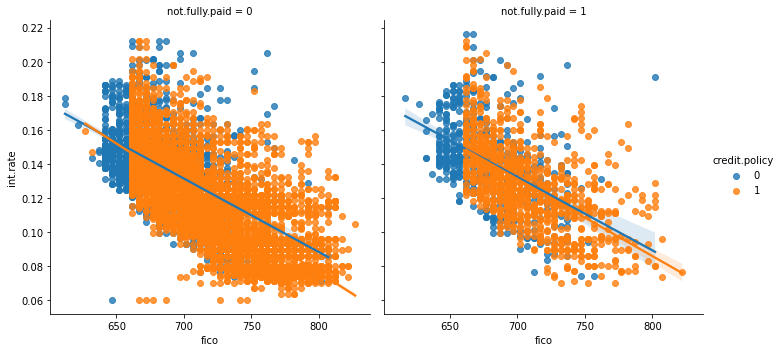

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico',y='int.rate',data=loan_data,hue='credit.policy',col='not.fully.paid')

Section 2: Data PreProcessing

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [ ]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#shape of the dataset
len(loan_data) #or by len(loan_data)

9578

Creating a Series that displays the total count of missing values per column.

In [ ]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
loan_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


Visualizing this using a heatmap

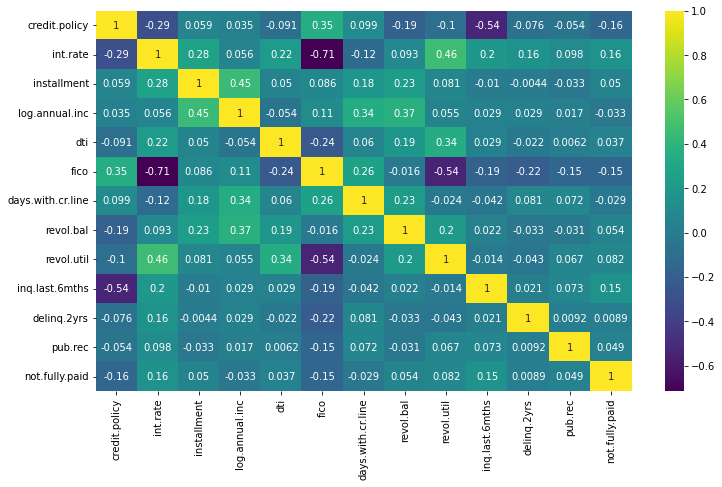

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(loan_data.corr(), annot=True, cmap="viridis")

In [ ]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
loan_data.select_dtypes(["object"]).columns

Index(['purpose'], dtype='object')

In [ ]:
loan_data.corr().std().sort_values(ascending=False) *100

fico                 42.690206
int.rate             39.481503
credit.policy        36.480256
revol.util           35.475485
inq.last.6mths       33.570959
dti                  30.248582
log.annual.inc       29.358639
delinq.2yrs          29.220990
revol.bal            29.206084
not.fully.paid       28.850042
days.with.cr.line    28.456923
pub.rec              28.237276
installment          27.964997
dtype: float64

In [ ]:
loans = pd.get_dummies(data=loan_data,columns=['purpose'],drop_first=True)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


standardization or normalization of data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))

StandardScaler()

In [ ]:
StandardScaler()

StandardScaler()

In [ ]:
scaled_loans= scaler.transform(loans.drop(['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business'],axis=1))

In [ ]:
df = pd.DataFrame(scaled_loans,columns=loans.columns[1:12])
df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [ ]:
final_data= pd.concat([df,loans[['credit.policy','not.fully.paid','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business']]],axis=1)
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,credit.policy,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,1,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,1,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,1,0,0,1,0,0,0,0
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,1,0,1,0,0,0,0,0


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y =final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Creating the Model

Running the cell below to import the necessary Keras functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(6704, 18)

In [ ]:
model = Sequential()

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.3)) #preventing overfitting

model.add(Dense(9, activation="relu")) #reducing number of neurons of a half
model.add(Dropout(0.3))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation="sigmoid")) #because it's a binary classification

model.compile(loss="binary_crossentropy", optimizer="adam")

# Choose whatever number of layers/neurons you want.
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 5, batch_size = 50, validation_data=(X_test, y_test))

Epoch 1/5
135/135 [==============================] - 0s 3ms/step - loss: 0.4317 - val_loss: 0.4090
Epoch 2/5
135/135 [==============================] - 0s 3ms/step - loss: 0.4254 - val_loss: 0.4062
Epoch 3/5
135/135 [==============================] - 0s 3ms/step - loss: 0.4287 - val_loss: 0.4072
Epoch 4/5
135/135 [==============================] - 0s 3ms/step - loss: 0.4247 - val_loss: 0.4057
Epoch 5/5
135/135 [==============================] - 0s 3ms/step - loss: 0.4266 - val_loss: 0.4058


Section 3: Evaluating Model Performance.

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.history.history #dictionary of losses

{'loss': [0.4316754639148712,
  0.42542174458503723,
  0.42873889207839966,
  0.4246610999107361,
  0.426589697599411],
 'val_loss': [0.40898871421813965,
  0.406196653842926,
  0.40722525119781494,
  0.40569007396698,
  0.40578949451446533]}

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses
#"loss" is the training loss
#"val_loss" (validation_loss) is the loss of our test set

,loss,val_loss
0,0.431675,0.408989
1,0.425422,0.406197
2,0.428739,0.407225
3,0.424661,0.405690
4,0.426590,0.405789


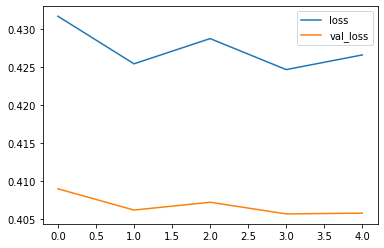

In [ ]:
losses.plot()

Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
